# AUTSL EDA

The [Ankara University Turkish Sign Language Dataset (AUTSL)](https://paperswithcode.com/dataset/autsl) is a large-scale, multimode dataset that contains isolated Turkish sign videos. It contains 226 signs that are performed by 43 different signers. There are 38,336 video samples in total. The samples are recorded using Microsoft Kinect v2 in RGB, depth and skeleton formats. The videos are provided at a resolution of 512×512. The skeleton data contains spatial coordinates, i.e. (x, y), of the 25 junction points on the signer body that are aligned with 512×512 data.

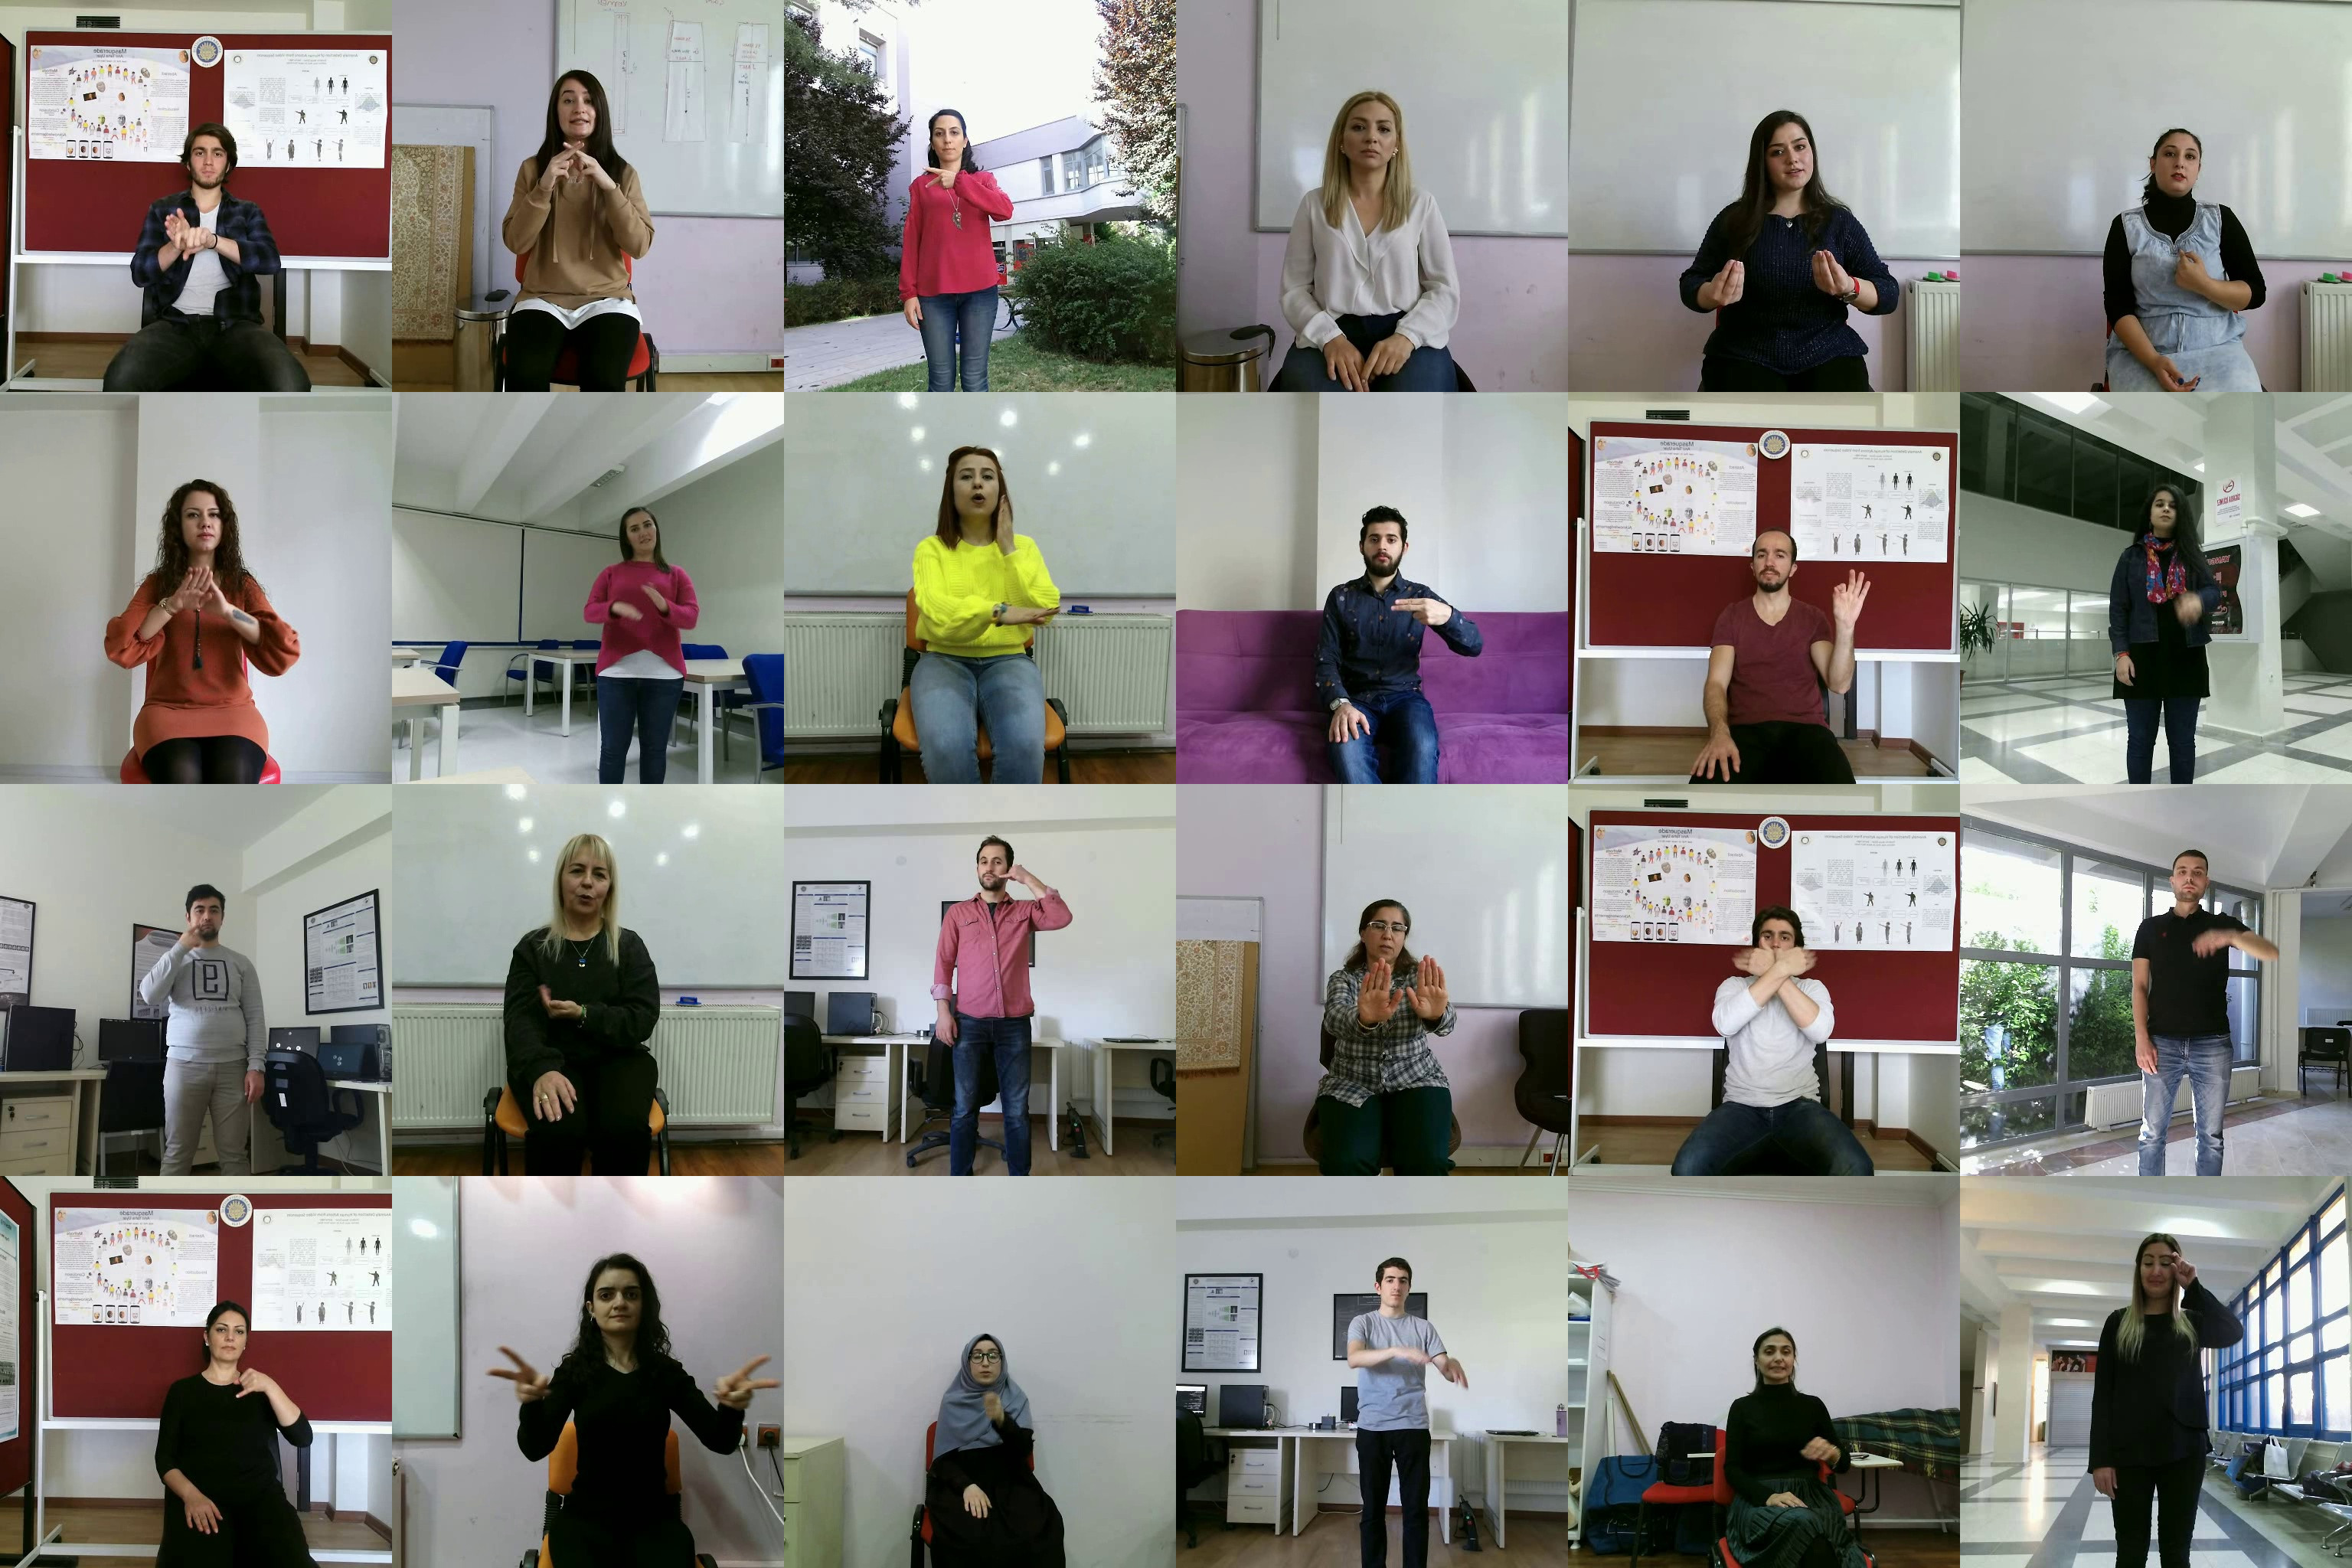

We will be using the preprocessed dataframe ```wlasl_preprocessed.csv``` for our EDA, where the features are as follows:

- **video_id** - Unique ID of the video.
- **split** - Type of the sample it is i.e. train/test/val.
- **class_id** - The unique ID for the gloss.
- **signer_id** - Unique ID for the signer in the video.
- **EN** - Sign that the video represents in English.
- **TR** - Sign that the video represents in Turkish.
- **frames** - The number of frames in the video.

## Imports

In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the CSV file

In [2]:
df = pd.read_csv('autsl_preprocessed.csv')

In [3]:
df.head()

,video_id,split,class_id,signer_id,EN,TR,frames
0,signer34_sample1_color,test,133,34,guest,misafir,63
1,signer34_sample2_color,test,61,34,retired,emekli,70
2,signer34_sample3_color,test,32,34,together,beraber,54
3,signer34_sample4_color,test,169,34,champion,sampiyon,64
4,signer34_sample5_color,test,77,34,show,gostermek,65


In [6]:
df[df['EN']=='accident'].head(50)

,video_id,split,class_id,signer_id,EN,TR,frames
478,signer34_sample479_color,test,108,34,accident,kaza,51
570,signer34_sample571_color,test,108,34,accident,kaza,38
589,signer34_sample590_color,test,108,34,accident,kaza,55
936,signer6_sample281_color,test,108,6,accident,kaza,56
963,signer6_sample308_color,test,108,6,accident,kaza,44
1126,signer6_sample471_color,test,108,6,accident,kaza,46
1558,signer39_sample225_color,test,108,39,accident,kaza,49
1620,signer39_sample287_color,test,108,39,accident,kaza,44
1718,signer39_sample385_color,test,108,39,accident,kaza,50
2117,signer14_sample119_color,test,108,14,accident,kaza,50


## Get the training set

For training, we use the train and validation split. We are interested in this because this subset of the dataset is what really matters during our training.

In [8]:
autsl = df[(df['split']=='train') | (df['split']=='val')]
autsl_test = df[df['split']=='test']
autsl.head()

,video_id,split,class_id,signer_id,EN,TR,frames
3741,signer0_sample1_color,train,41,0,ugly,cirkin,58
3742,signer0_sample2_color,train,104,0,radiator,kalorifer,63
3743,signer0_sample3_color,train,205,0,tax,vergi,48
3744,signer0_sample4_color,train,26,0,feast,bayram,57
3745,signer0_sample5_color,train,191,0,ceiling,tavan,90


## Frames of the samples

In [9]:
frames = autsl['frames'].value_counts().to_frame()
frames.index.name = 'frames'
frames.rename(columns={'frames': 'frequency'}, inplace=True)
frames.head()

,frequency
frames,
59,1352
58,1327
61,1326
60,1315
57,1284


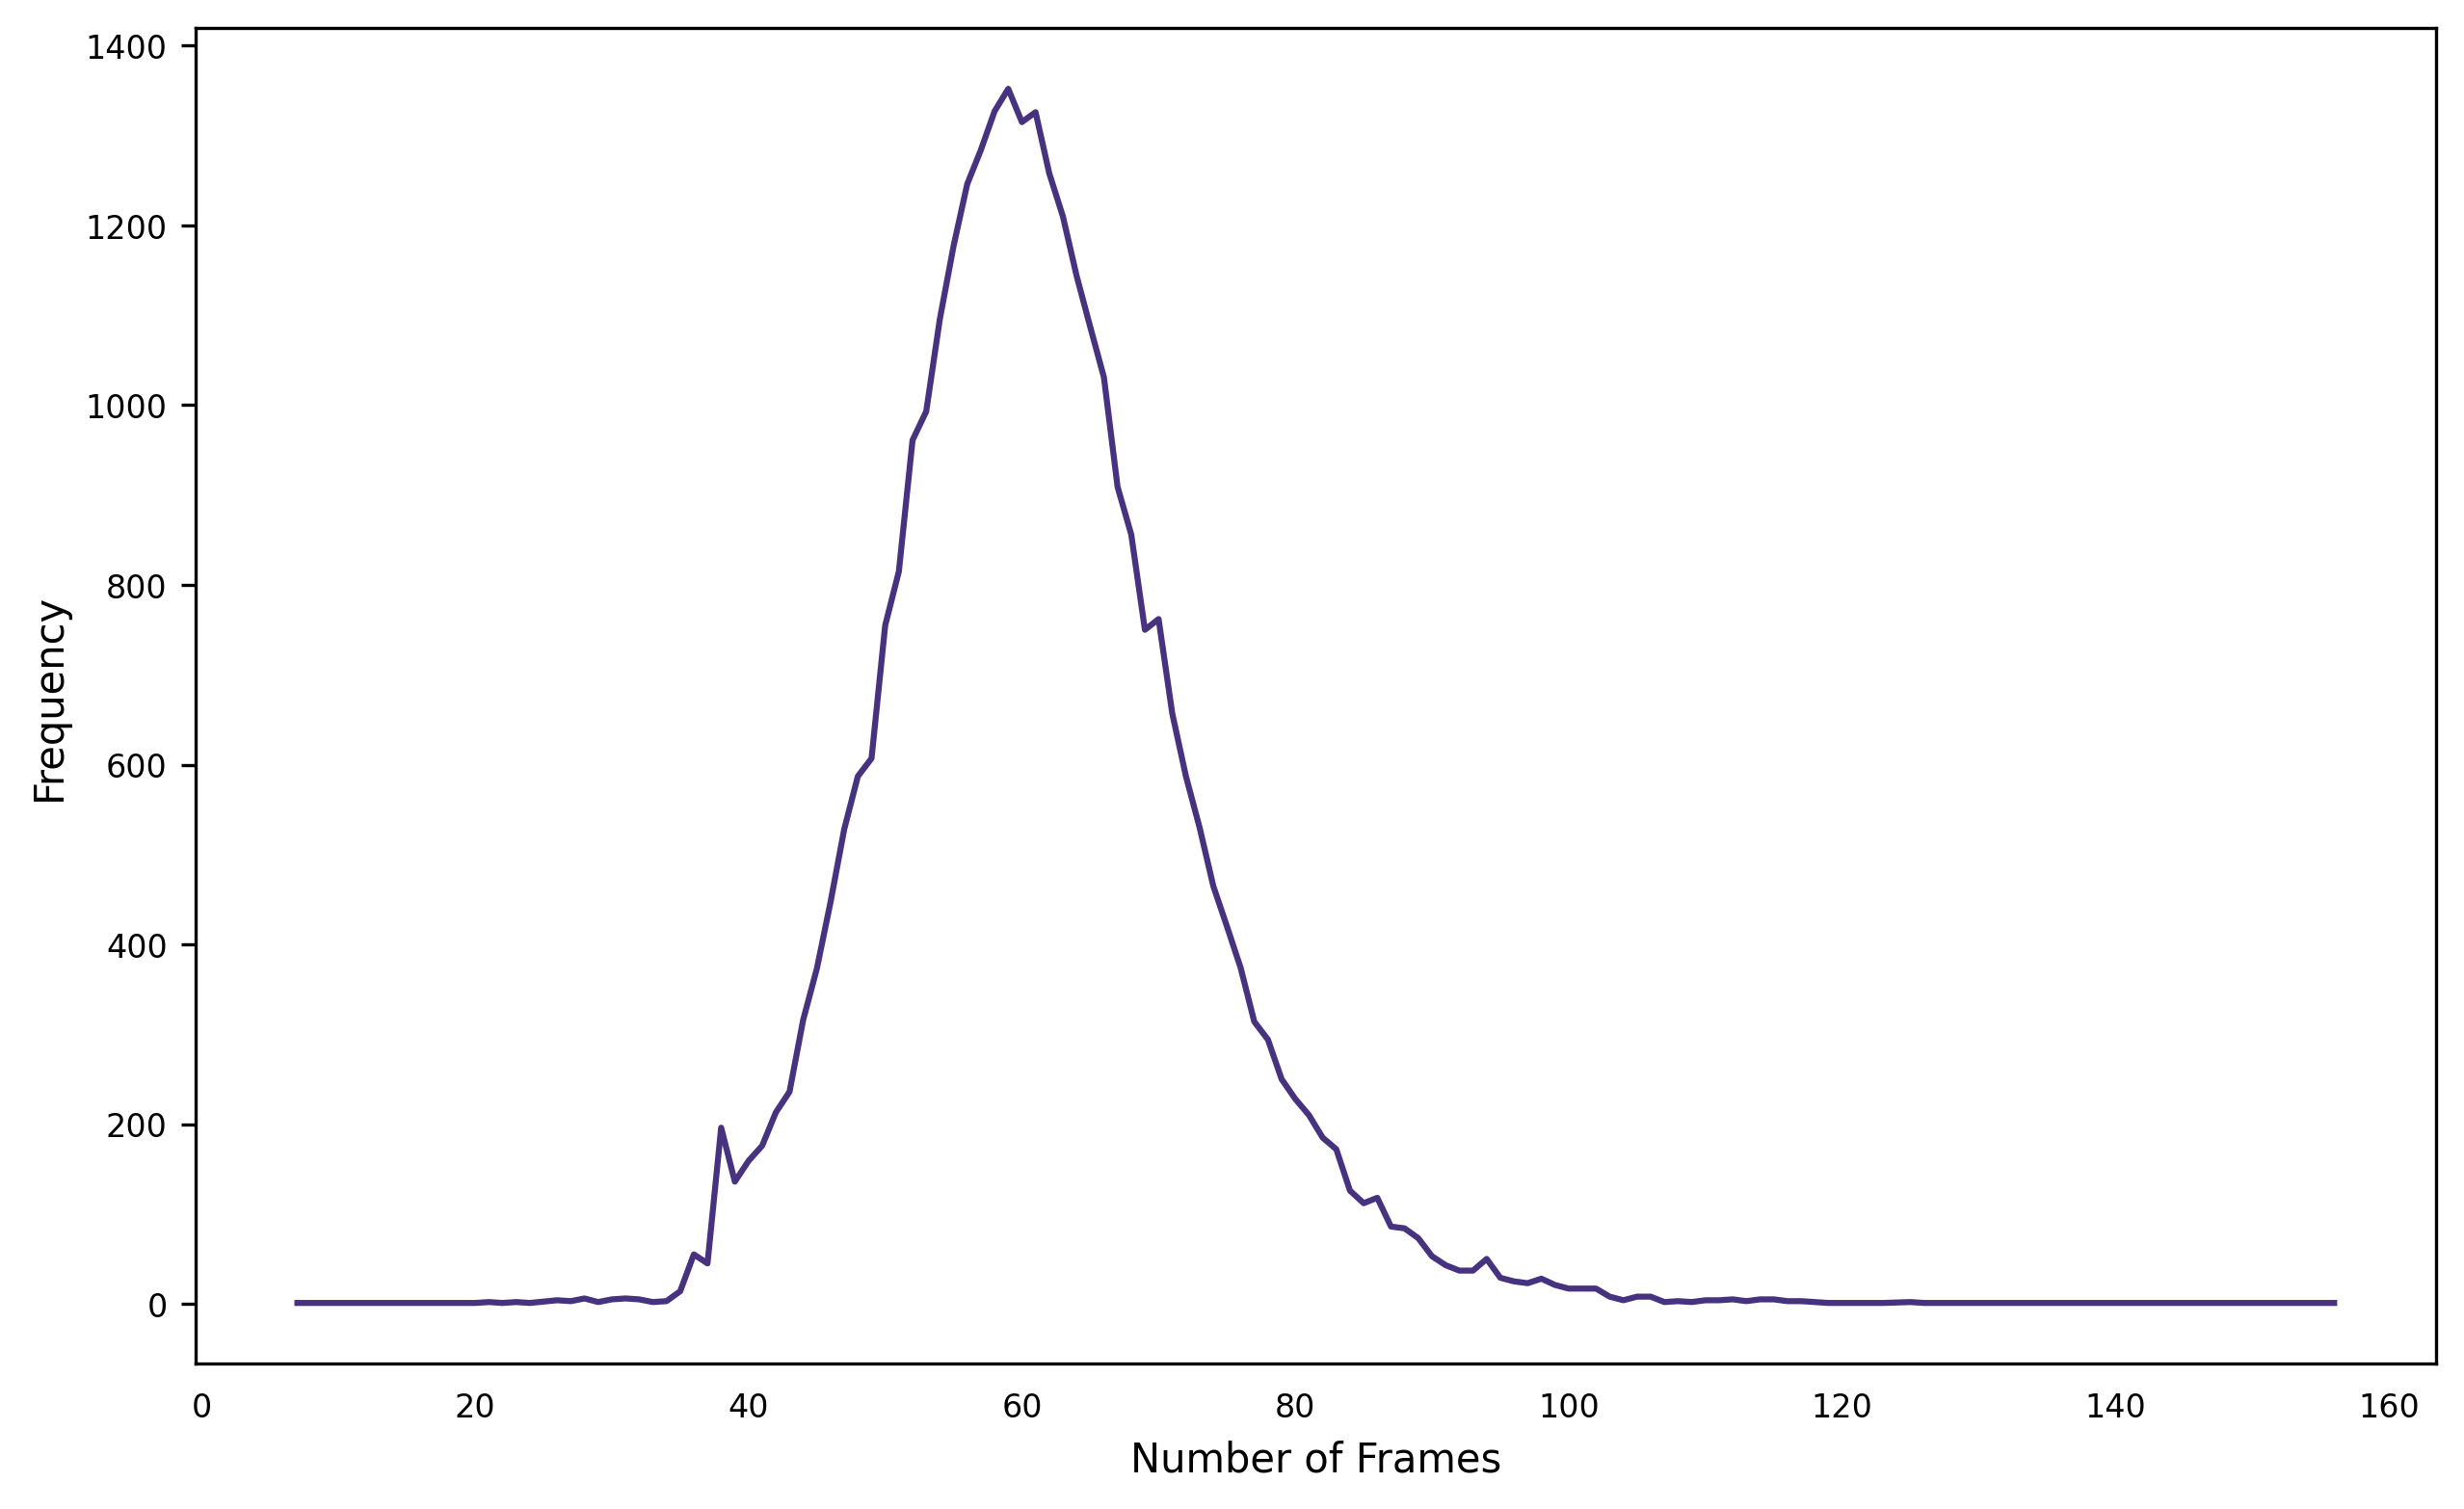

In [11]:
# Plot the number of frames against the frequency
plt.figure(figsize=(10,6), dpi=300)
sns.set_palette('viridis')
g = sns.lineplot(x='frames', y='frequency', data=frames)
# plt.xticks(rotation=90)
plt.xlabel('Number of Frames', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
# g.set(xticklabels=[])  
g.tick_params(bottom=False)  # remove the ticks
g.tick_params(axis='y', labelsize=8)
g.tick_params(axis='x', labelsize=8)

In [12]:
autsl['frames'].max()

156

In [13]:
autsl['frames'].mode()

0    59
Name: frames, dtype: int64

<AxesSubplot: xlabel='frames'>

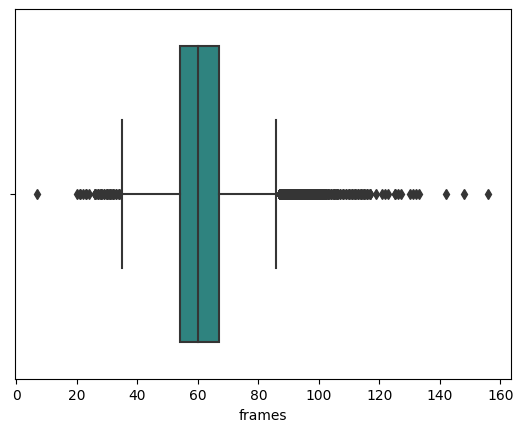

In [18]:
sns.boxplot(x=autsl['frames'], palette='viridis')

## Samples per Signer

In [22]:
autsl_signers = autsl.groupby('signer_id', as_index=False)['signer_id'].value_counts().sort_values('count')
autsl_signers.rename(columns={'count':'samples'}, inplace=True)
autsl_signers.head()

,signer_id,samples
14,16,436
15,17,441
13,15,447
20,22,626
28,32,629


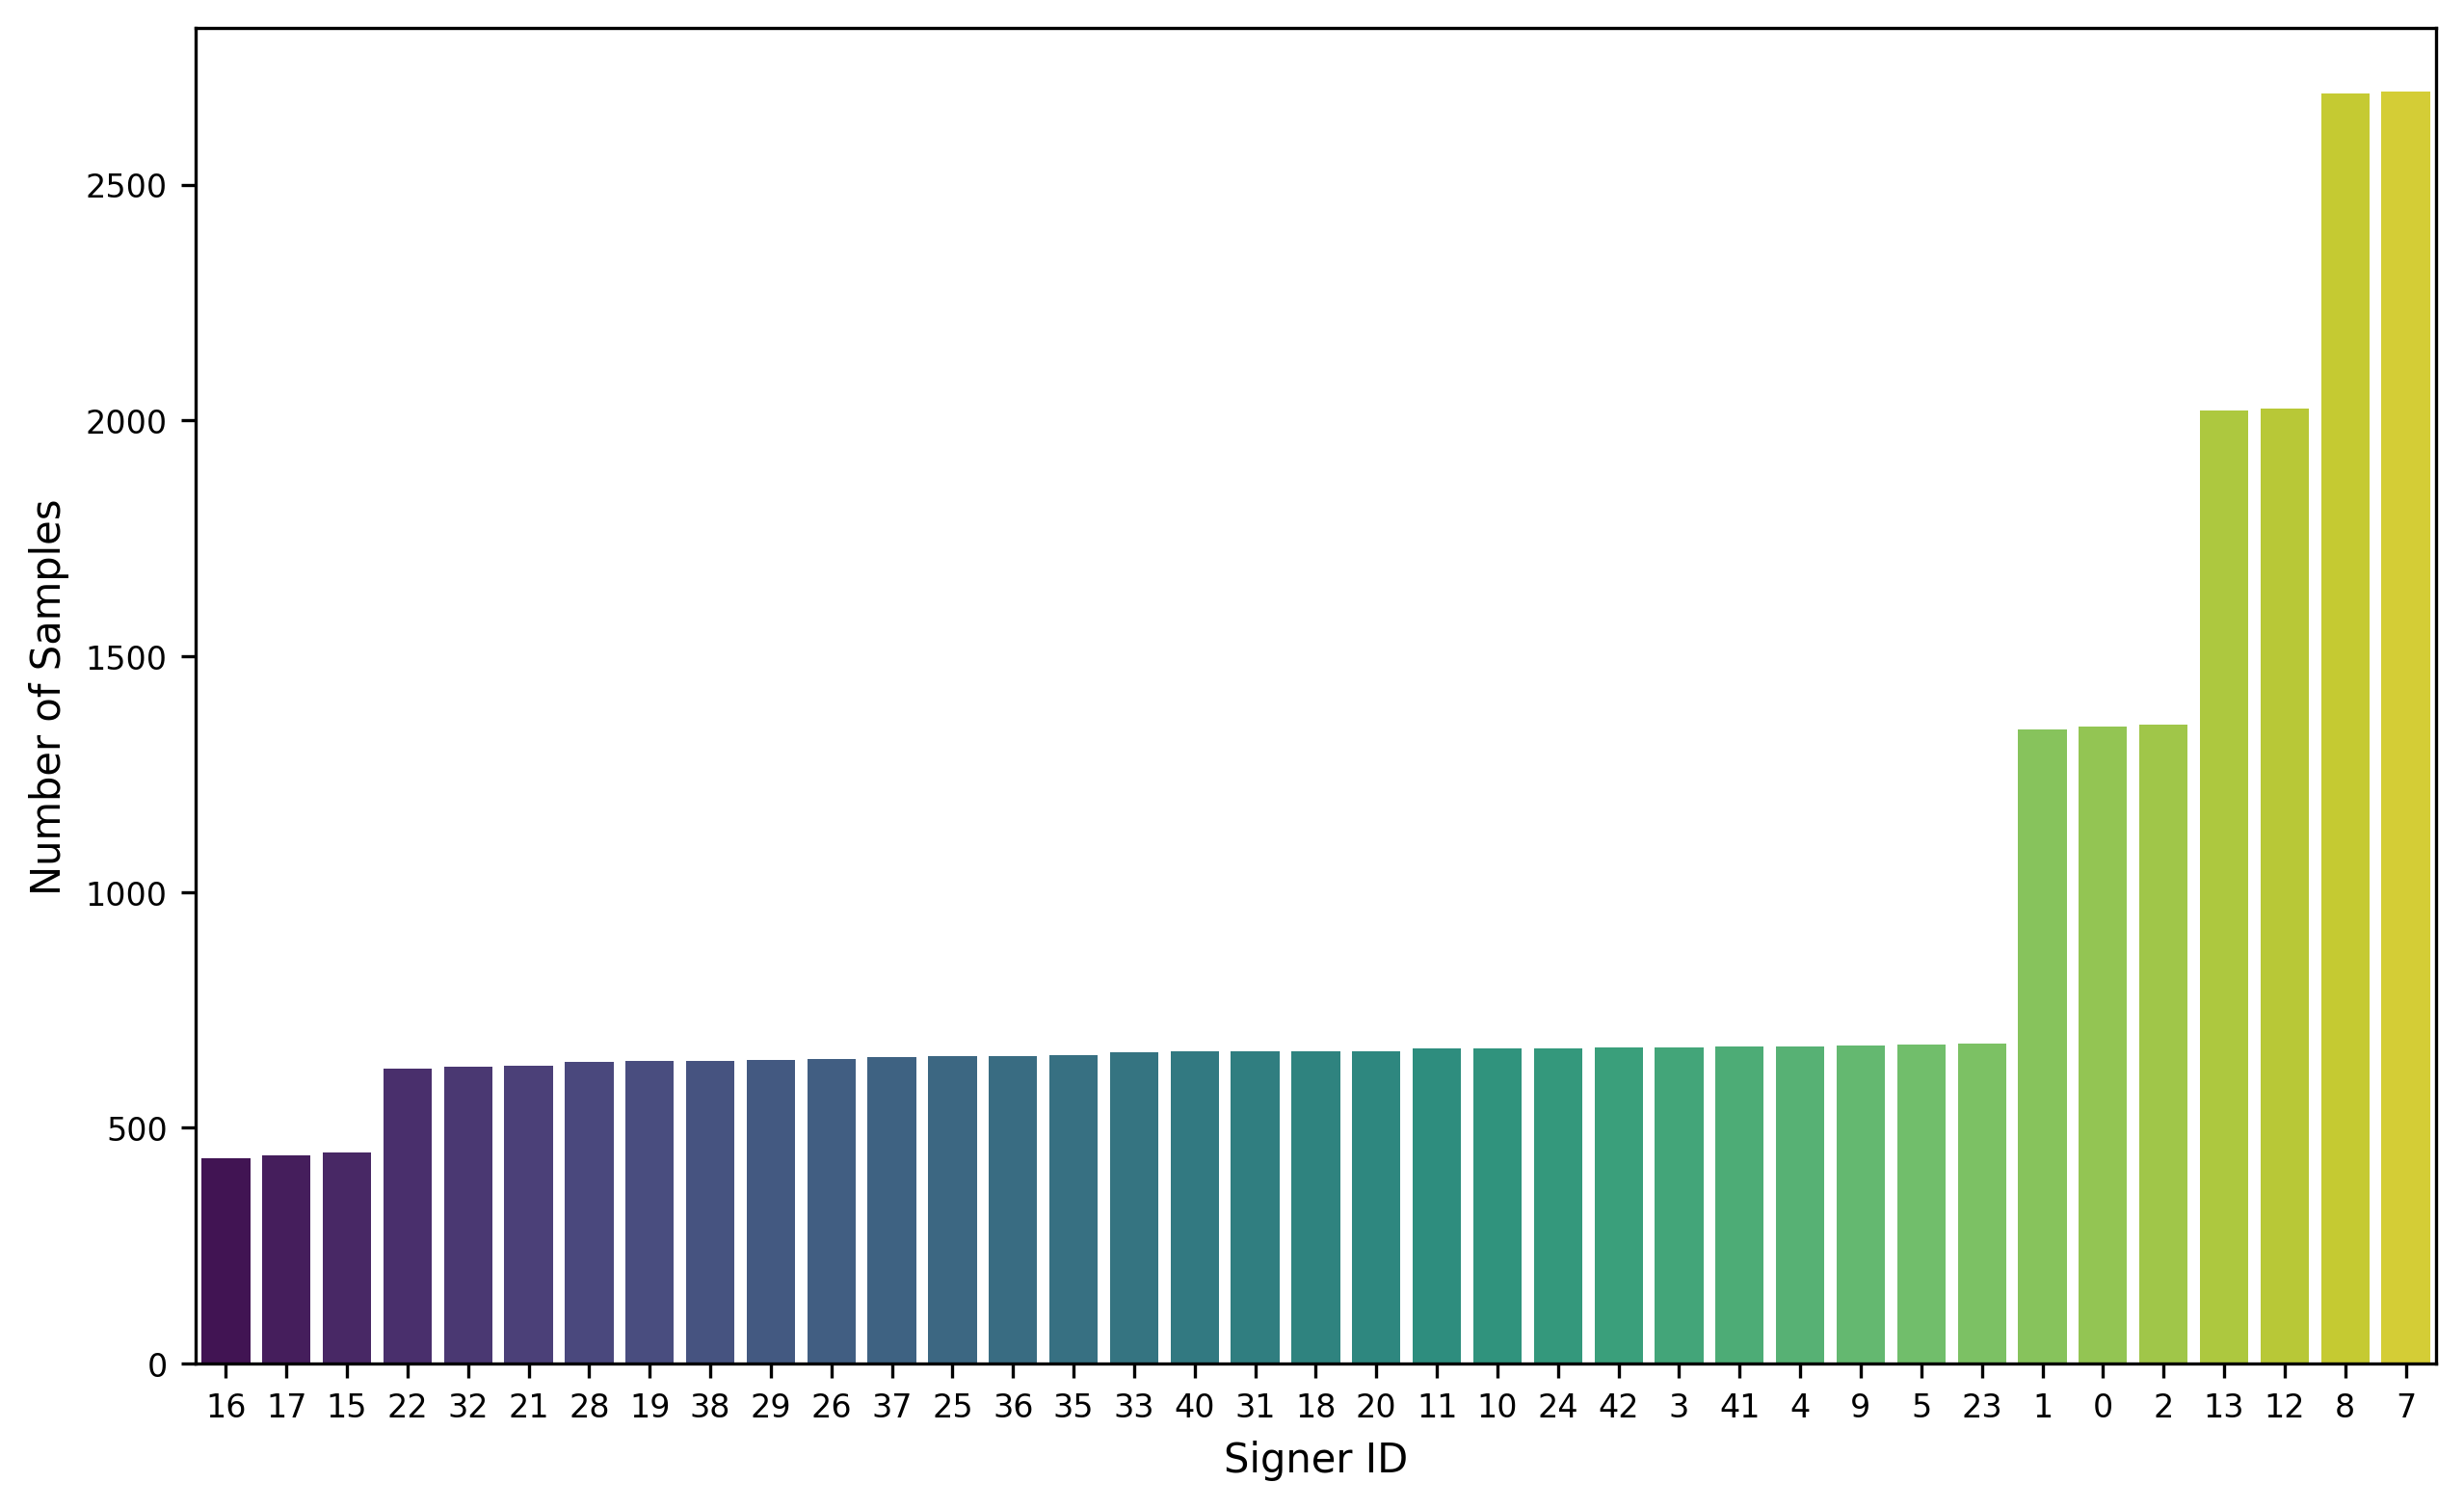

In [27]:
sns.set_palette('viridis')
plt.figure(figsize=(10,6), dpi=300)

g = sns.barplot(x='signer_id',
                y='samples',
                data=autsl_signers,
                order=autsl_signers.sort_values('samples').signer_id,
                palette='viridis')

# plt.xticks(rotation=90)
plt.xlabel('Signer ID', fontsize=10)
plt.ylabel('Number of Samples', fontsize=10) 
g.tick_params(bottom=True)  # remove the ticks
# g.set(xticklabels=[])
g.tick_params(axis='y', labelsize=8)
g.tick_params(axis='x', labelsize=8)

In [28]:
len(autsl_signers)

37

## Gloss vs. Frames

In [30]:
gloss_frames = autsl.groupby('EN', as_index=False)['frames'].mean()
gloss_frames.head()

,EN,frames
0,I,55.877551
1,absent,57.183673
2,accident,55.400000
3,allright,53.404110
4,alone,62.537415


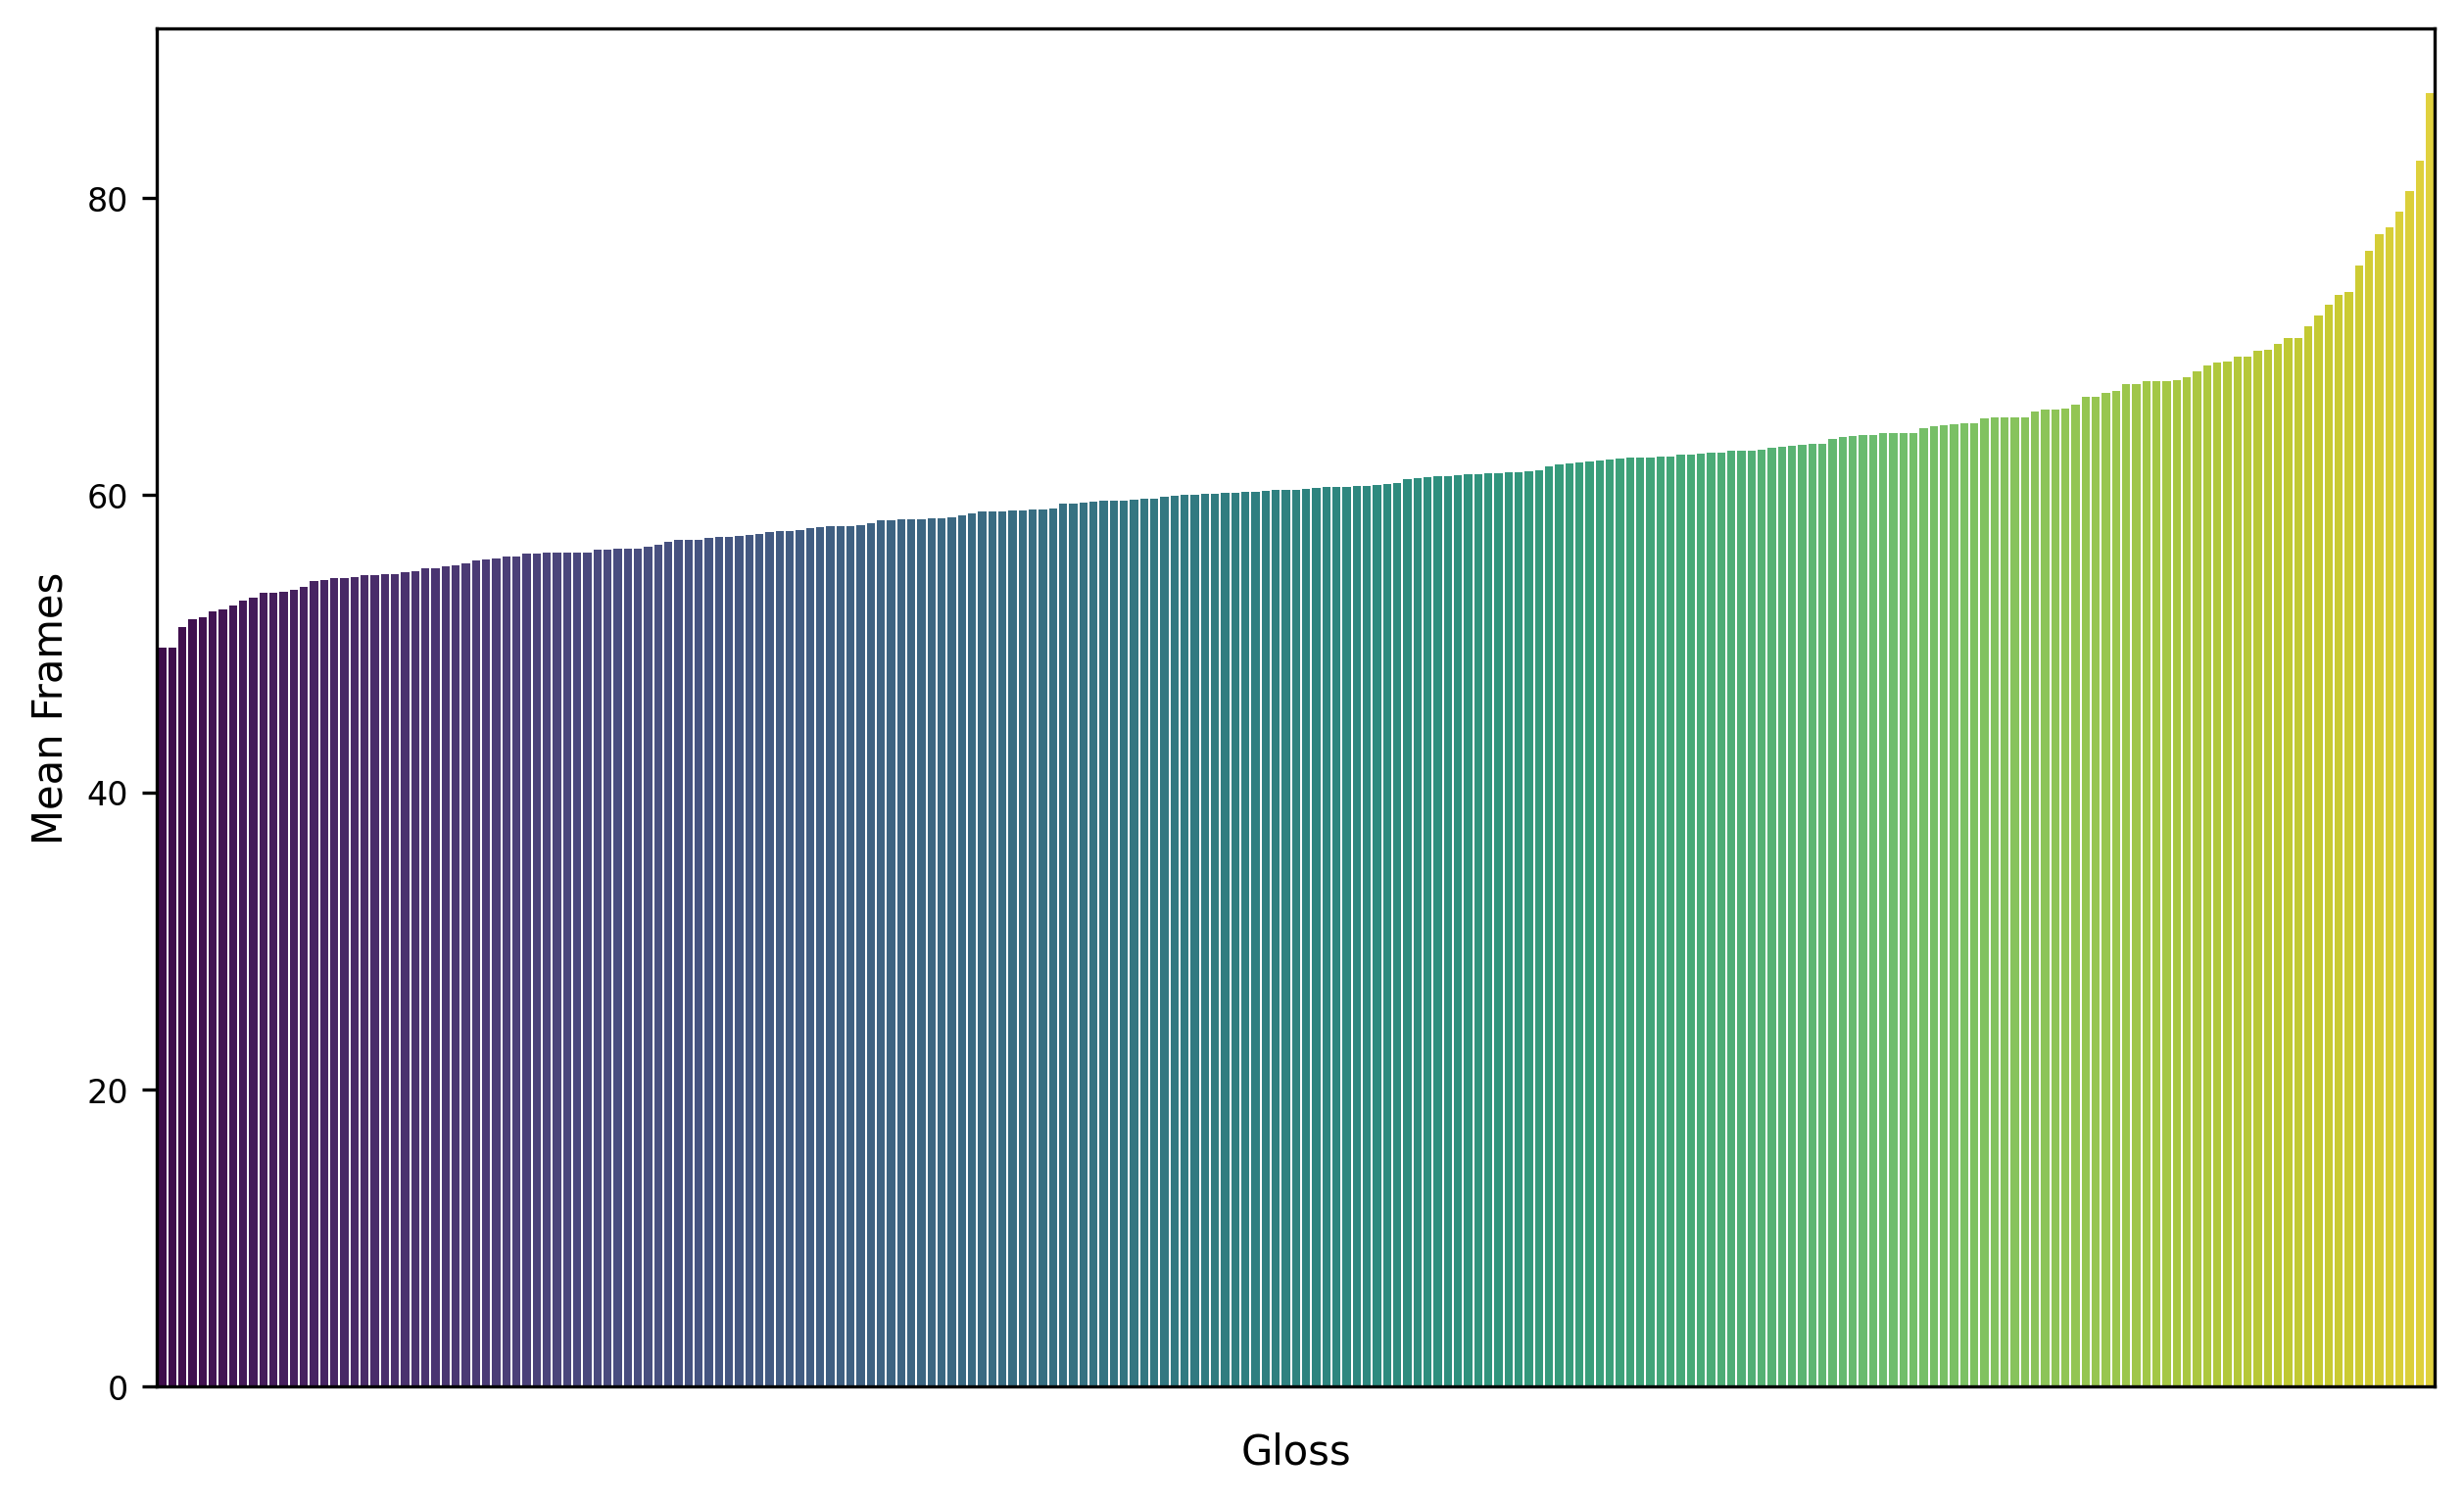

In [32]:
# Frame distribution of different glosses
gloss_frames = autsl.groupby('EN')['frames'].mean().to_frame().sort_values('frames')
gloss_frames['EN'] = gloss_frames.index

plt.figure(figsize=(10,6), dpi=300)
g = sns.barplot(x='EN', y='frames', data=gloss_frames, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Gloss', fontsize=10)
plt.ylabel('Mean Frames', fontsize=10) 
g.set(xticklabels=[])  
g.tick_params(bottom=False)  # remove the ticks
g.tick_params(axis='y', labelsize=8)
g.tick_params(axis='x', labelsize=8)

## Gloss vs. Samples

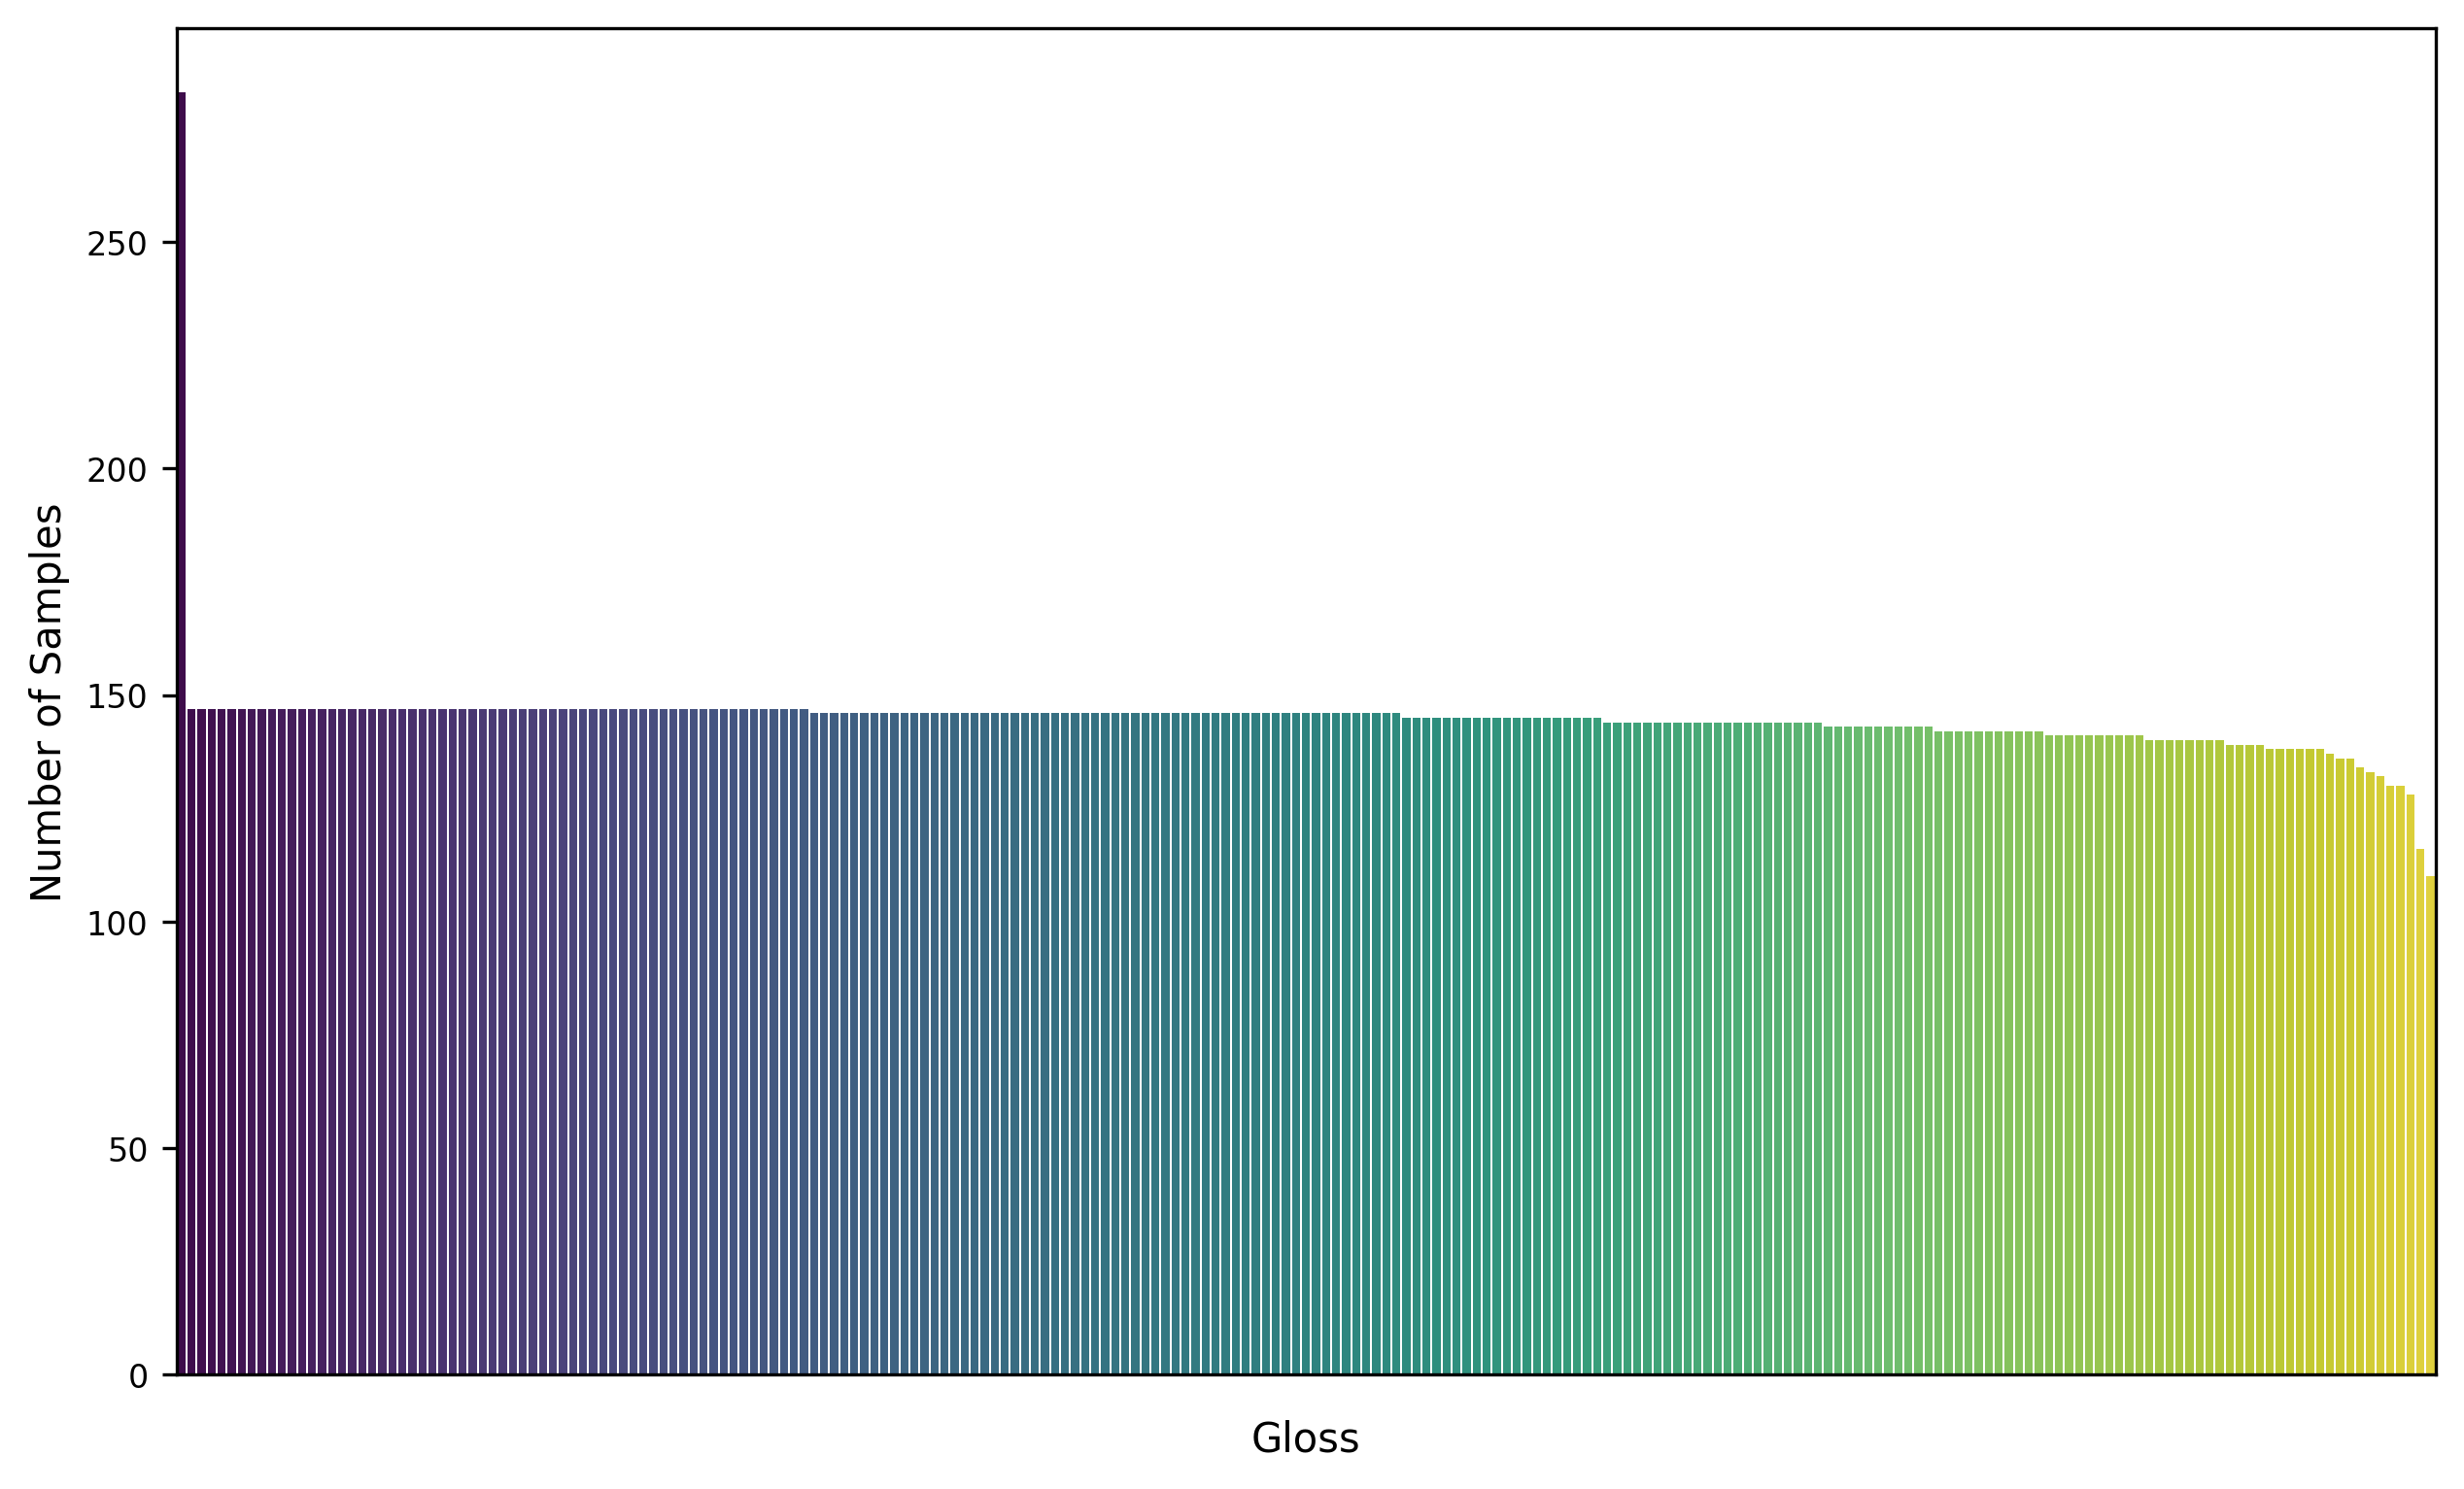

In [39]:
plt.figure(figsize=(10,6), dpi=300)
g = sns.countplot(x='EN',
                  data=autsl,
                  palette='viridis',
                  order=pd.value_counts(autsl['EN']).index)
plt.xticks(rotation=90)
plt.xlabel('Gloss', fontsize=10)
plt.ylabel('Number of Samples', fontsize=10)
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.tick_params(axis='x', labelsize=5)
g.tick_params(axis='y', labelsize=8)

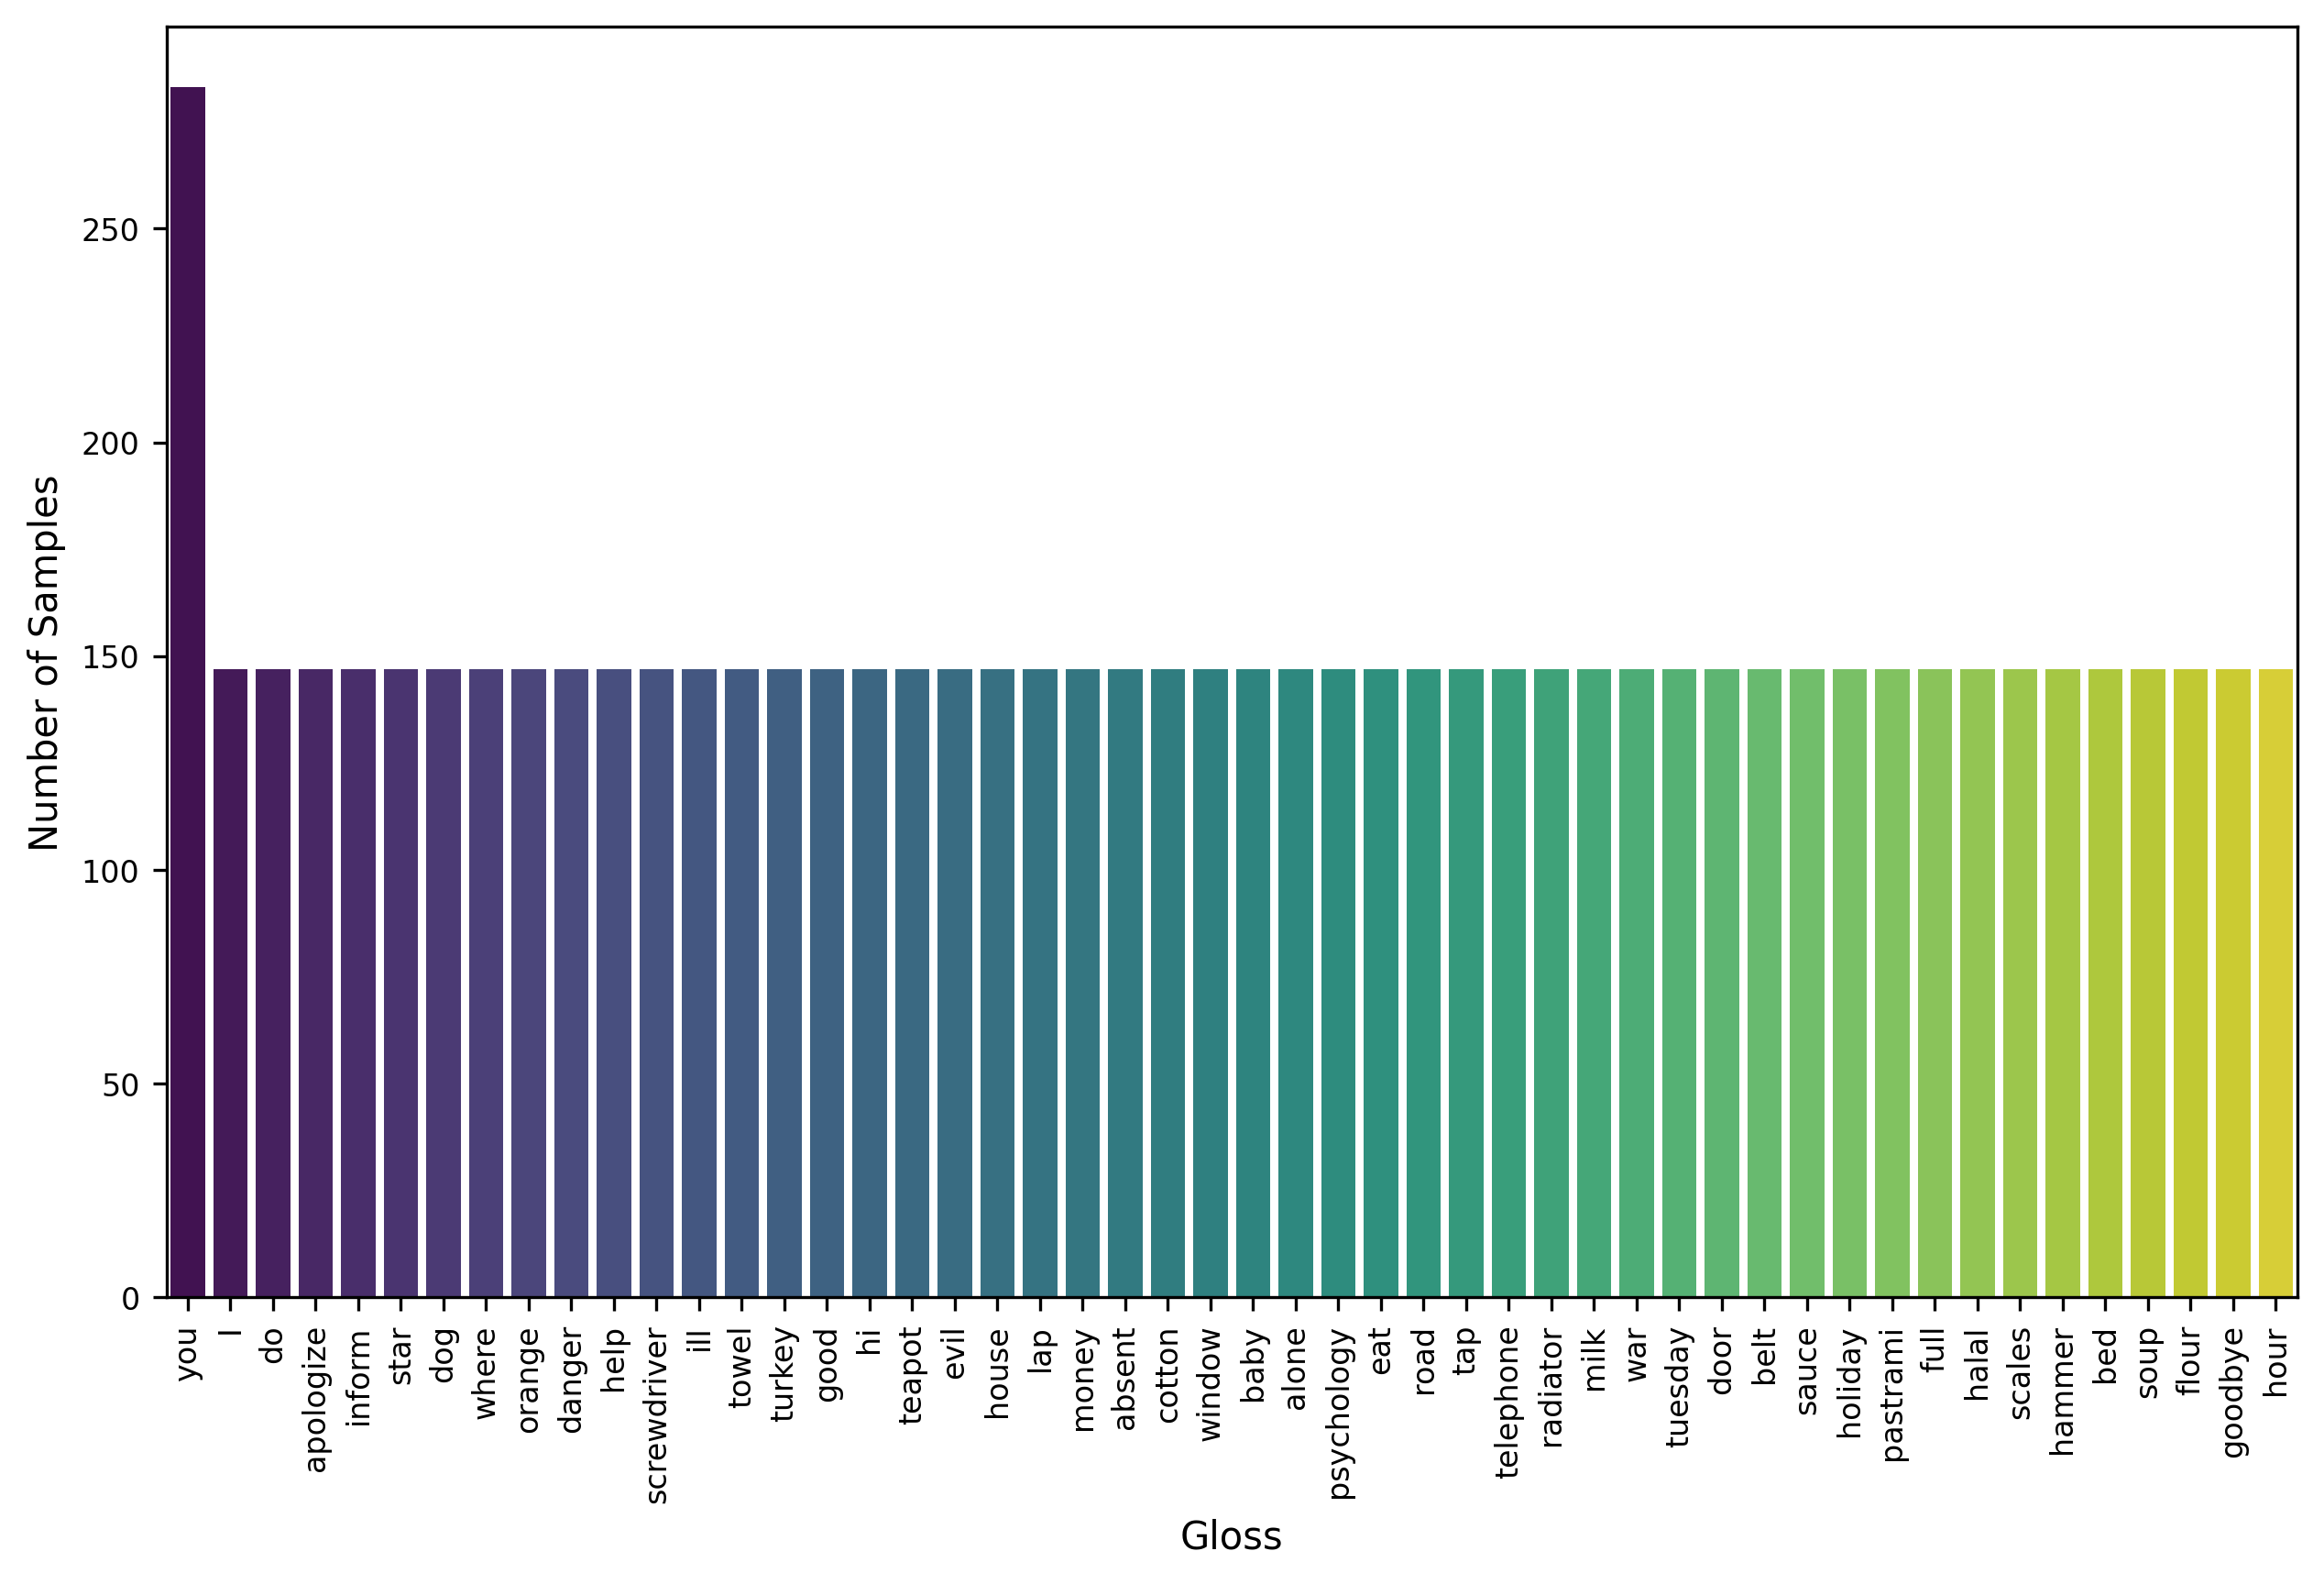

In [33]:
# Plot top 50 glosses with the most number of samples
plt.figure(figsize=(10,6), dpi=300)
g = sns.countplot(x='EN', data=autsl, palette='viridis', order=pd.value_counts(autsl['EN']).head(50).index)
plt.xticks(rotation=90)
plt.xlabel('Gloss', fontsize=10)
plt.ylabel('Number of Samples', fontsize=10)
g.tick_params(axis='x', labelsize=8)
g.tick_params(axis='y', labelsize=8)

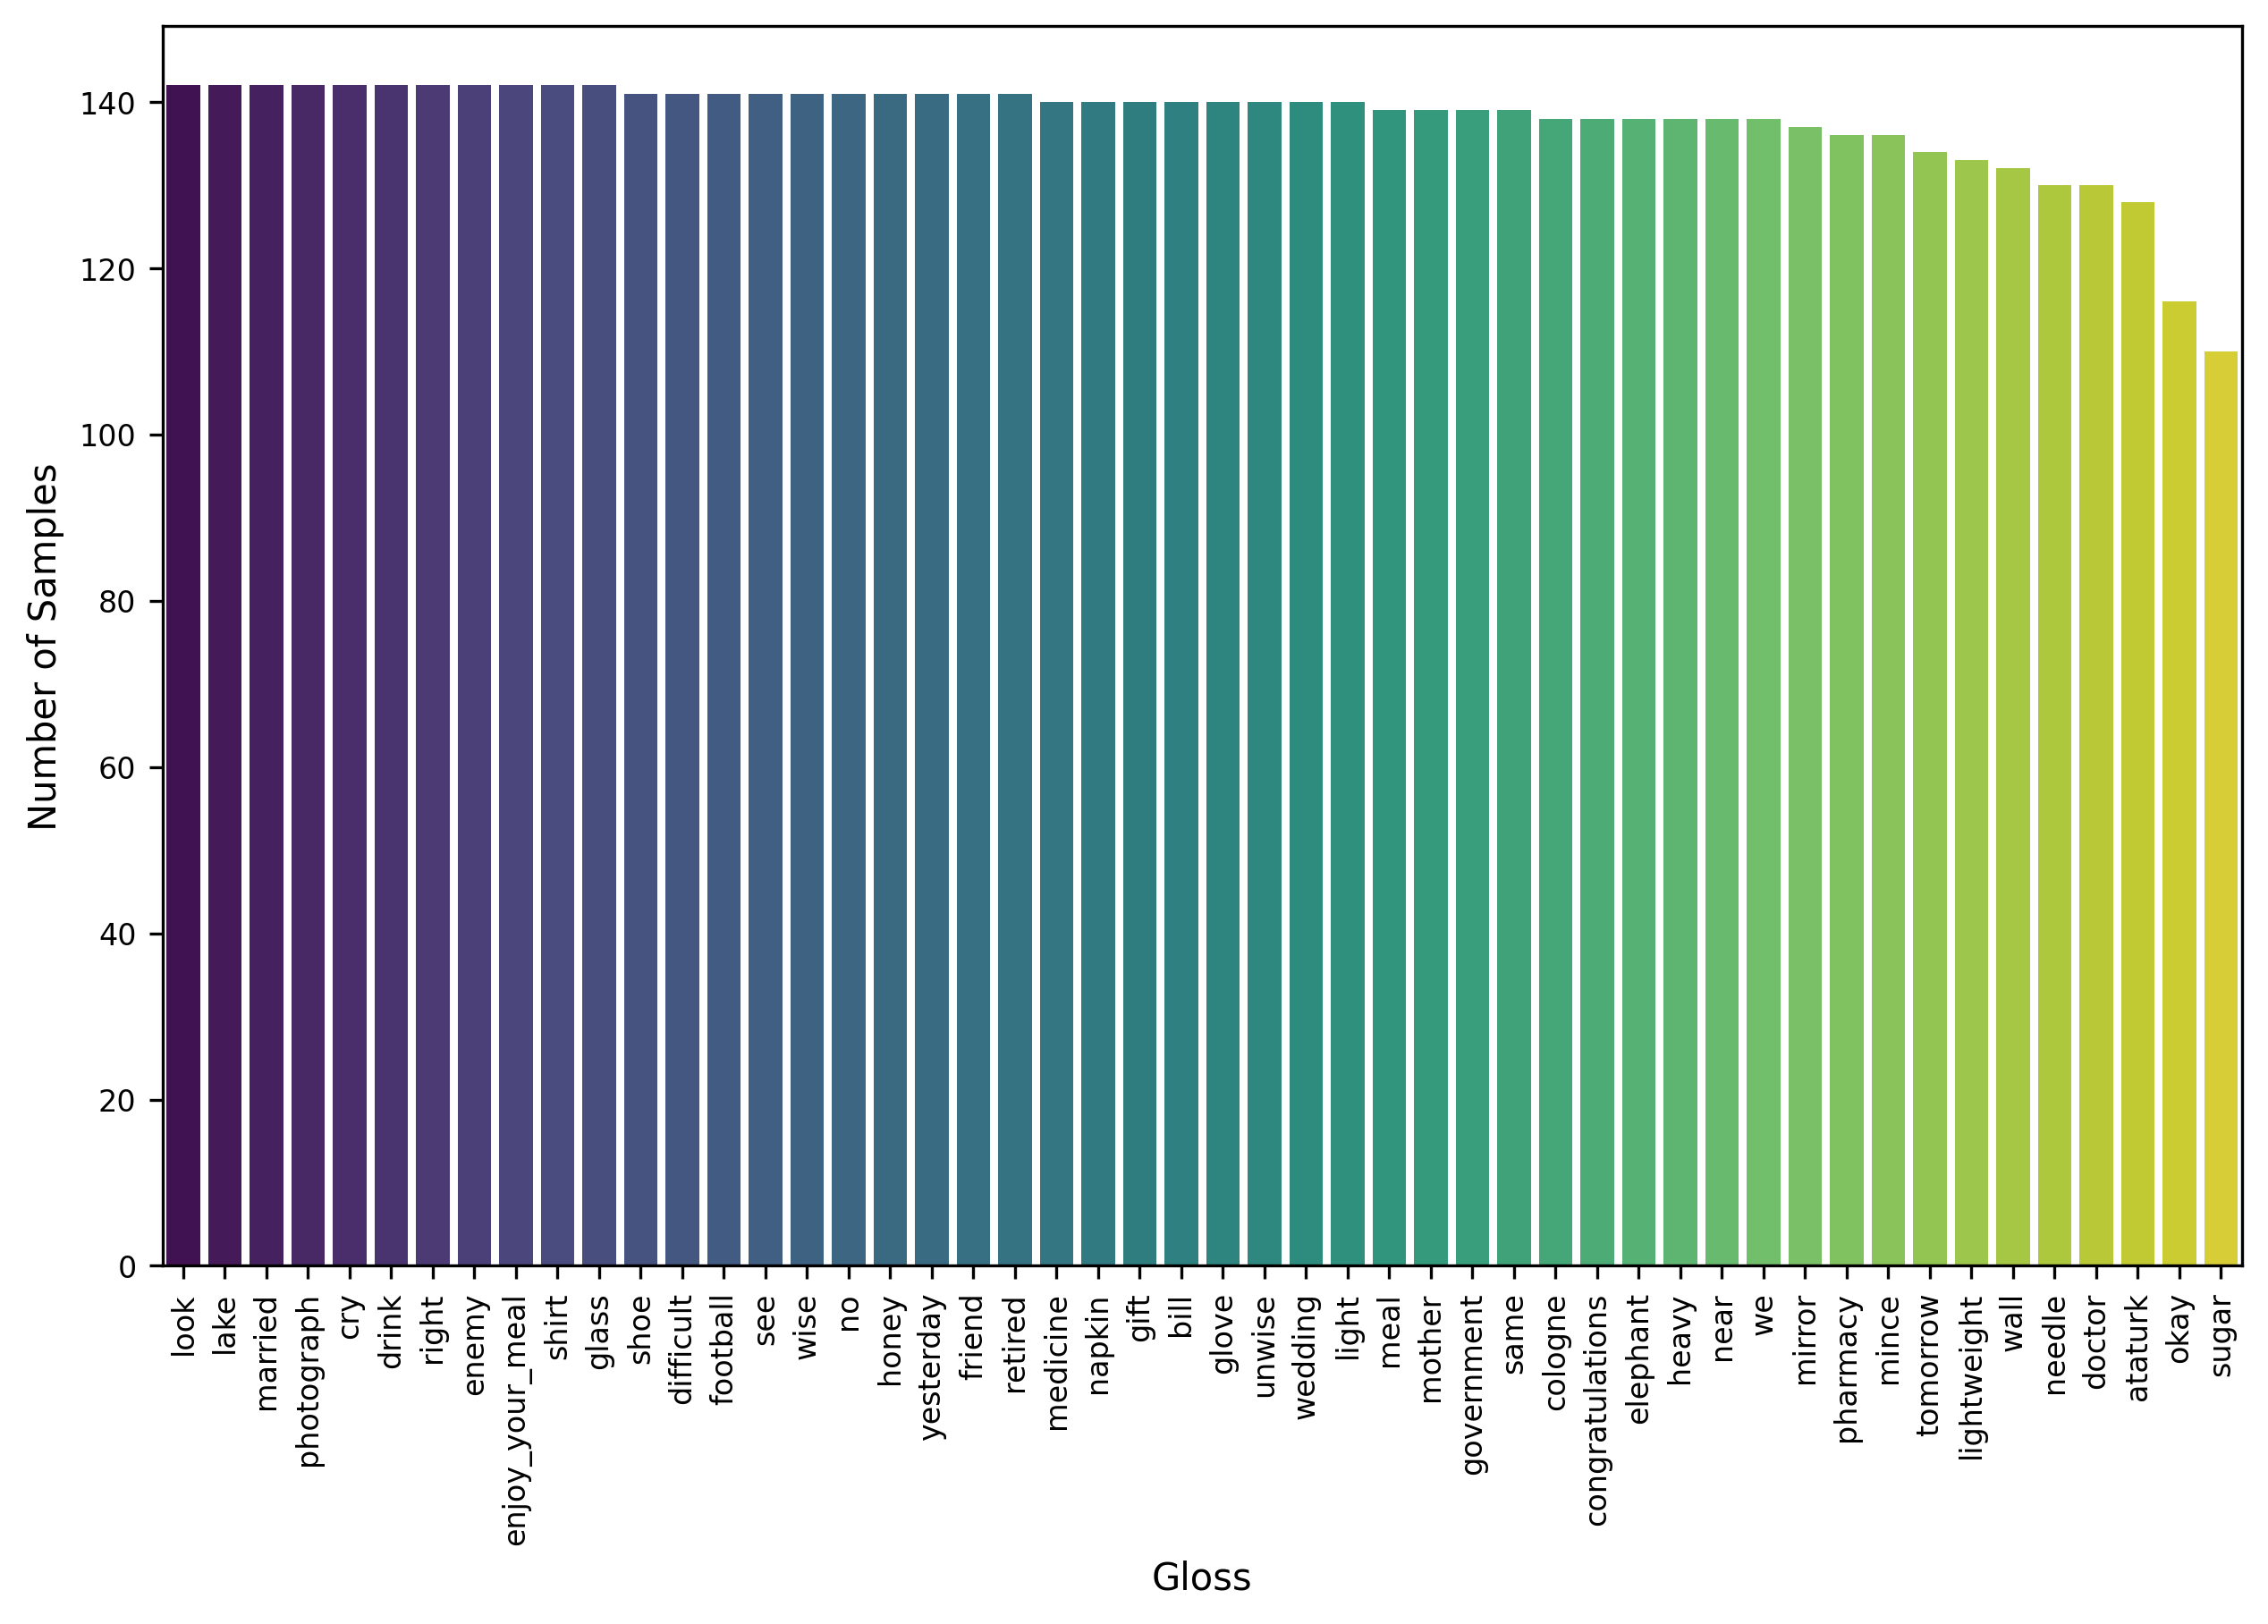

In [34]:
# Plot bottom 50 glosses with the least number of samples
plt.figure(figsize=(10,6), dpi=300)
g = sns.countplot(x='EN', data=autsl, palette='viridis', order=pd.value_counts(autsl['EN']).tail(50).index)
plt.xticks(rotation=90)
plt.xlabel('Gloss', fontsize=10)
plt.ylabel('Number of Samples', fontsize=10)
g.tick_params(axis='x', labelsize=8)
g.tick_params(axis='y', labelsize=8)